In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt # set figure size and font
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 18

%load_ext autoreload
%autoreload 2

# Dry demo (from existing data)
## 1-qubit circuit
### Measuring 0 or 1 -> are we detecting a photon?
What does the output look like if we send a single qubit through this interferometer circuit: <br>
(circuit diagram) <br>
For each data point, we ran this experiment with 1024 shots (1 qubit at a time) and counted how many 0's and 1's we measured at the output. We repeated this experiment a few times (a total of 5 trials) for each value of $\phi$.

In [2]:
# Load existing data
num0 = np.loadtxt("./Demo_data/1-Qubit/13angles/Num_0s_5Trials_13angles_manila.csv", delimiter=",").reshape((13, 5))
num1 = np.loadtxt("./Demo_data/1-Qubit/13angles/Num_1s_5Trials_13angles_manila.csv", delimiter=",").reshape((13, 5))

`num0` and `num1` correspond to the number of times we measure 0 or 1 at the circuit output. Both `num0` and `num1` are 2D arrays with 13 rows and 5 columns. Each row corresponds to a value of $\phi$ ranging from 0 to $2\pi$ radians (or 0 to 360 degrees, if you like). <br>
This is what the top row ($\phi=0$) of `num1` looks like:

In [3]:
num1[0, :]

array([10.,  6.,  4.,  6.,  7.])

In [4]:
# the sum of num1 + num0 is always equal to 1024 (total number of shots)
num0[0, :]

array([1014., 1018., 1020., 1018., 1017.])

This means that at $\phi=0$ (no gravitational wave), when we sent 1024 photons through the interferometers, we **barely detected any photons** at the output. On the other hand, at $\phi=\pi=180^\circ$, the data look very different -- most photons are detected!

In [5]:
num1[6, :]

array([964., 959., 959., 977., 950.])

### Let's plot the data!
To better see the trends in `num0` and `num1`, we can plot both values as a function of $\phi$. Since we have 5 data points at each value of $\phi$, we can take the average from 5 trials

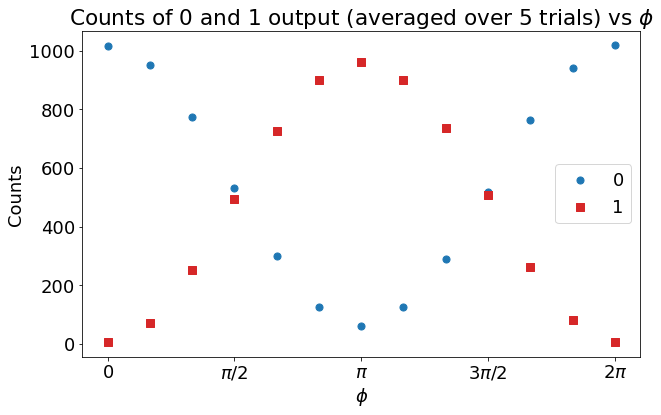

In [6]:
phi = np.linspace(0, 2*np.pi, 13)
mean0 = np.mean(num0, axis=1) # averaged over 5 trials at each phi
mean1 = np.mean(num1, axis=1) # averaged over 5 trials at each phi

fig, ax = plt.subplots()
plt.scatter(phi, mean0, label="0", s=50)
plt.scatter(phi, mean1, label="1", s=50, color="C3", marker="s")
plt.legend()
ax.set_ylabel("Counts")
ax.set_xlabel("$\phi$")
plt.title("Counts of 0 and 1 output (averaged over 5 trials) vs $\phi$")

xticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2 * np.pi]
ticklabels = ['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$']
plt.xticks(xticks, ticklabels)

plt.show()

Here we used 1024 shots, but this number can change. Let's convert our results into probabilities (divide `num0` and `num1` by 1024) and see how well they agree with the theoretical values $\cos^2{(\phi/2)}$ and $\sin^2{(\phi/2)}$ that we calculated.

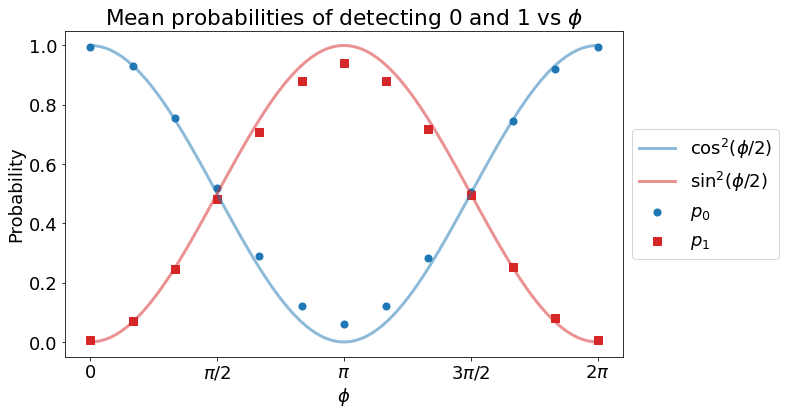

In [7]:
phi = np.linspace(0, 2*np.pi, 13)
p0 = np.mean(num0, axis=1) / 1024 # calculate probability p0 (divide count by 1024)
p1 = np.mean(num1, axis=1) / 1024 # calculate probability p1 (divide count by 1024)

fig, ax = plt.subplots()
plt.scatter(phi, p0, label="$p_0$", s=50)
plt.scatter(phi, p1, label="$p_1$", s=50, color="C3", marker="s")

# plot theoretical curves
phi_rad = np.linspace(0, 2 * np.pi, 100)
plt.plot(phi_rad, np.cos(phi_rad/2)**2, lw=3, alpha=0.5, label="$\cos^2{(\phi/2)}$")
plt.plot(phi_rad, np.sin(phi_rad/2)**2, lw=3, alpha=0.5, color="C3", label="$\sin^2{(\phi/2)}$")

ax.set_ylabel("Probability")
ax.set_xlabel("$\phi$")
plt.title("Mean probabilities of detecting 0 and 1 vs $\phi$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

xticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2 * np.pi]
ticklabels = ['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$']
plt.xticks(xticks, ticklabels)

plt.show()

### What do we see from the above plot?
1. At $\phi=0, 2\pi$ (no gravitational wave), $p_1$ is near zero whereas $p_0$ is near maximum. This means most photons do not reach the detector!
2. At other values of $\phi$ (there is gravitational wave!), some photons will reach the detector.
3. Remember that total probability $p_0 + p_1 = 1$
4. There are slight differences between experimental data and theory curves. Why?

## Can we guess $\phi$ from experimental data?
Because the probabilities $p_0, p_1$ depend on $\phi$ and we know the relationship between the probabilities and $\phi$, we can "guess" the value of $\phi$ ($\phi$ is unknown for a real detection at LIGO) based on $p_0$ and $p_1$ that we measure. Let's try this now!

Before we proceed, let's define a new parameter that combines $p_0$ and $p_1$! <br>
We'll call it $P$ for polarization and let $P = p_1 - p_0$ define the difference between the two. Theoretically, $P = \sin^2{(\phi/2)} - \cos^2{(\phi/2)} = -\cos{\phi}$ (you can check this!). Similar to previously, we can plot the polarization vs $\phi$. We also plot the slope $dP/d\phi = \sin{\phi}$. This slope tells us where the data (P) are more or less sensitive to a change in $\phi$.

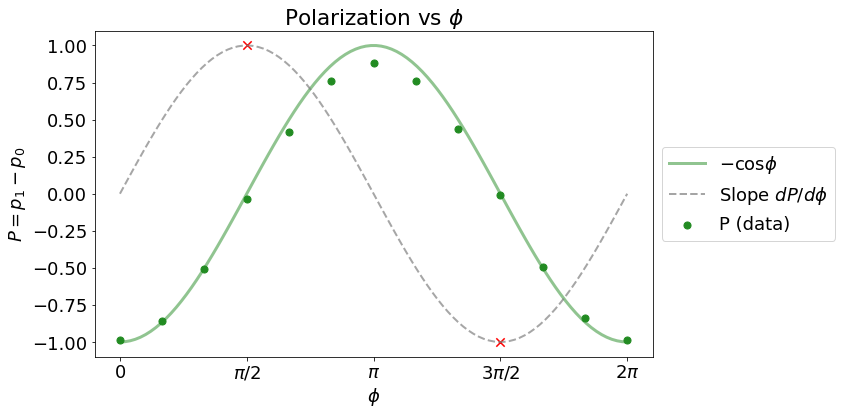

In [8]:
P = p1 - p0
phi = np.linspace(0, 2*np.pi, 13)

fig, ax = plt.subplots()
# plot polarization data
plt.scatter(phi, P, label="P (data)", s=50, color="forestgreen")

# plot theoretical curves
phi_rad = np.linspace(0, 2 * np.pi, 100)
plt.plot(phi_rad, -np.cos(phi_rad), lw=3, alpha=0.5, label="$-\cos{\phi}$", color="forestgreen")

# plot slope
plt.plot(phi_rad, np.sin(phi_rad), lw=2, alpha=0.7, label="Slope $dP/d\phi$", color="grey", linestyle="dashed")
# indicate where slope is maximum
extr_x = [np.pi/2, 3*np.pi/2]
extr_y = [1, -1]
plt.scatter(extr_x, extr_y, color="r", marker="x", s=70)

ax.set_ylabel("$P = p_1 - p_0$")
ax.set_xlabel("$\phi$")
plt.title("Polarization vs $\phi$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

xticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2 * np.pi]
ticklabels = ['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$']
plt.xticks(xticks, ticklabels)

plt.show()

The red crosses mark where $P$ is the most sensitive to $\phi$ (slope = $\pm1$). At these points, $P=p_0-p_1=0$. <br>
We can zoom into the data near $\phi = \pi/2$ and center around it.

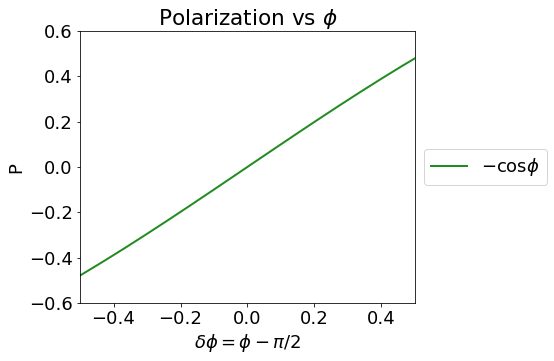

In [9]:
fig, ax = plt.subplots(figsize=(6,5))
dphi = phi_rad - np.pi/2 # delta_phi (shift from pi/2)

# plt.scatter(phi-np.pi/2, P, label="P (data)", s=50, color="purple")
# plot theoretical curves
phi_rad = np.linspace(0, 2 * np.pi, 100)
plt.plot(dphi, -np.cos(phi_rad), lw=2, label="$-\cos{\phi}$", color="forestgreen")

extr_x = [0]
extr_y = [1]
# plt.scatter(extr_x, extr_y, color="r", marker="x", s=70)

ax.set_ylabel("P")
ax.set_xlabel("$\delta\phi = \phi - \pi/2$")
plt.title("Polarization vs $\phi$")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlim([-0.5,0.5])
ax.set_ylim([-0.6,0.6])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Inferring $\phi$ from data
From this plot, if we run an experiment and measure $P = 0.2$, we can use the purple line to infer what $\phi$ is! See an example below: 

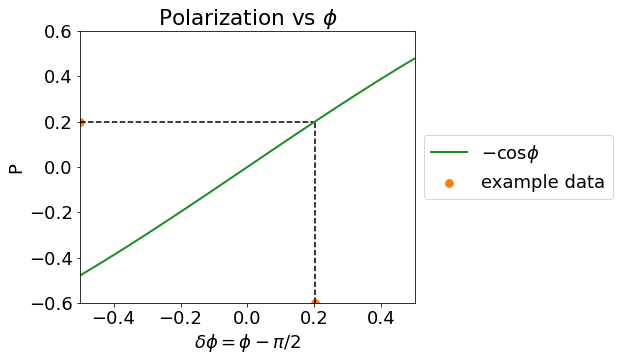

In [10]:
fig, ax = plt.subplots(figsize=(6,5))
dphi = phi_rad - np.pi/2 # delta_phi (shift from pi/2)

# plt.scatter(phi-np.pi/2, P, label="P (data)", s=50, color="purple")
# plot theoretical curves
phi_rad = np.linspace(0, 2 * np.pi, 100)
plt.plot(dphi, -np.cos(phi_rad), lw=2, label="$-\cos{\phi}$", color="forestgreen")

extr_x = [0]
extr_y = [1]
# plt.scatter(extr_x, extr_y, color="r", marker="x", s=70)

ax.set_ylabel("P")
ax.set_xlabel("$\delta\phi = \phi - \pi/2$")
plt.title("Polarization vs $\phi$")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlim([-0.5,0.5])
ax.set_ylim([-0.6,0.6])

def inv_line(P):
    return -(np.arccos(P)-np.pi/2)

plt.scatter([-0.5,inv_line(0.2)], [0.2,-0.6], s=60, color="C1", label="example data")
plt.hlines(0.2, -0.5, inv_line(0.2), color="k", linestyles="dashed")
plt.vlines(inv_line(0.2), -0.6, 0.2, color="k", linestyles="dashed")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

By finding the inverse of the purple line -> we obtain $\delta\phi \approx 0.20$

In [11]:
# Linear function to approximate the cosine curve
# Fit the data
def func_pol(x, A, C):
    return -A * np.cos(np.pi/2 + x) + C

from scipy.optimize import curve_fit
guess = [1, 0]
params, covs = curve_fit(func_pol, phi-np.pi/2, P, p0=guess)

# Extract amplitude and offset from the manila fit
A, C = params
theta0 = 0

def calc_phi_fit_linear(P, A, C):
    return (1 / A) * (P - C)

In [12]:
calc_phi_fit_linear(0.2, A, C)

0.2597360271959918

## Are we done here? No! Remember that experiments are about making the same measurements over and over.
We learned from the quantum circuit that even with the same $\phi$, we won't always get the same $p_0, p_1$ (and $P$). How can we be more certain about our results? We take A LOT of measurements to make sure!

In [13]:
# Reminder: 5 trials at the same phi(phi = pi/2) gave 5 different counts
num1[3, :] - num0[3, :]

array([-36., -70., -28., -64.,   6.])

In [14]:
# or in terms of polarization P
(num1[3, :] - num0[3, :]) / 1024

array([-0.03515625, -0.06835938, -0.02734375, -0.0625    ,  0.00585938])

### Load a new dataset (75 trials, unknown $\phi$)

In [15]:
# Load existing data
num0 = np.loadtxt("./Demo_data/1-Qubit/Sensitivity/Num_0s_75Trials.csv", delimiter=",")
num1 = np.loadtxt("./Demo_data/1-Qubit/Sensitivity/Num_1s_75Trials.csv", delimiter=",")

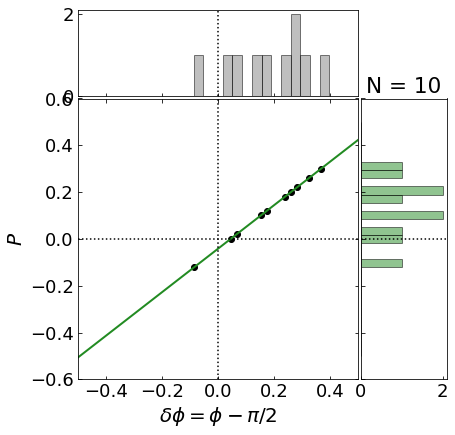

In [16]:
P = (num1 - num0) / 100 # polarization
phi_guess = calc_phi_fit_linear(P, A, C) # inverse the function to compute phi

N = 10 # a number from 1 to 75
y_2p = P[:N]
x_2p = phi_guess[:N]

# Add a straight line to plot
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
fig = plt.figure(figsize=(6, 6))
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
# ax_scatter.plot(dphi, -np.cos(dphi + np.pi/2), color="forestgreen", lw=2)
ax_scatter.plot(dphi, A*dphi + C, color="forestgreen", lw=2)
ax_scatter.scatter(x_2p, y_2p, color="k")

# xticks = [0, np.pi / 2, np.pi]
# xticklabels = ['$0$', '$\pi / 2$', '$\pi$']
# plt.xticks(xticks, xticklabels)
ax_scatter.set_ylim([-0.6, 0.6])
ax_scatter.set_xlim([-0.5, 0.5])
ax_scatter.set_xlabel(r"$\delta\phi = \phi-\pi/2$", fontsize=20)
ax_scatter.set_ylabel(r"$P$", fontsize=20)

ax_scatter.axvline(x=0, color="k", ls=":", label="$\phi = \pi/2$")
ax_scatter.axhline(y=0, color="k", ls=":")

# Histogram (phi)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# plot angle histogram (along x)
bins_angle = np.linspace(-0.5, 0.5, 30)
ax_histx.hist(x_2p, bins=bins_angle, alpha=0.5, \
              lw=1, ec='k', fc='grey')
ax_histx.axvline(x=0, color="k", ls=':')

# plot p_1 histogram (along y)
bins_p1 = np.linspace(-0.5, 0.5, 30)
ax_histy.hist(y_2p, bins=bins_p1, orientation='horizontal', alpha=0.5, \
              lw=1, ec='k', fc='forestgreen')
ax_histy.axhline(y=0, color="k", ls=':')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.title(f"N = {N}")

plt.show()

<IPython.core.display.Javascript object>


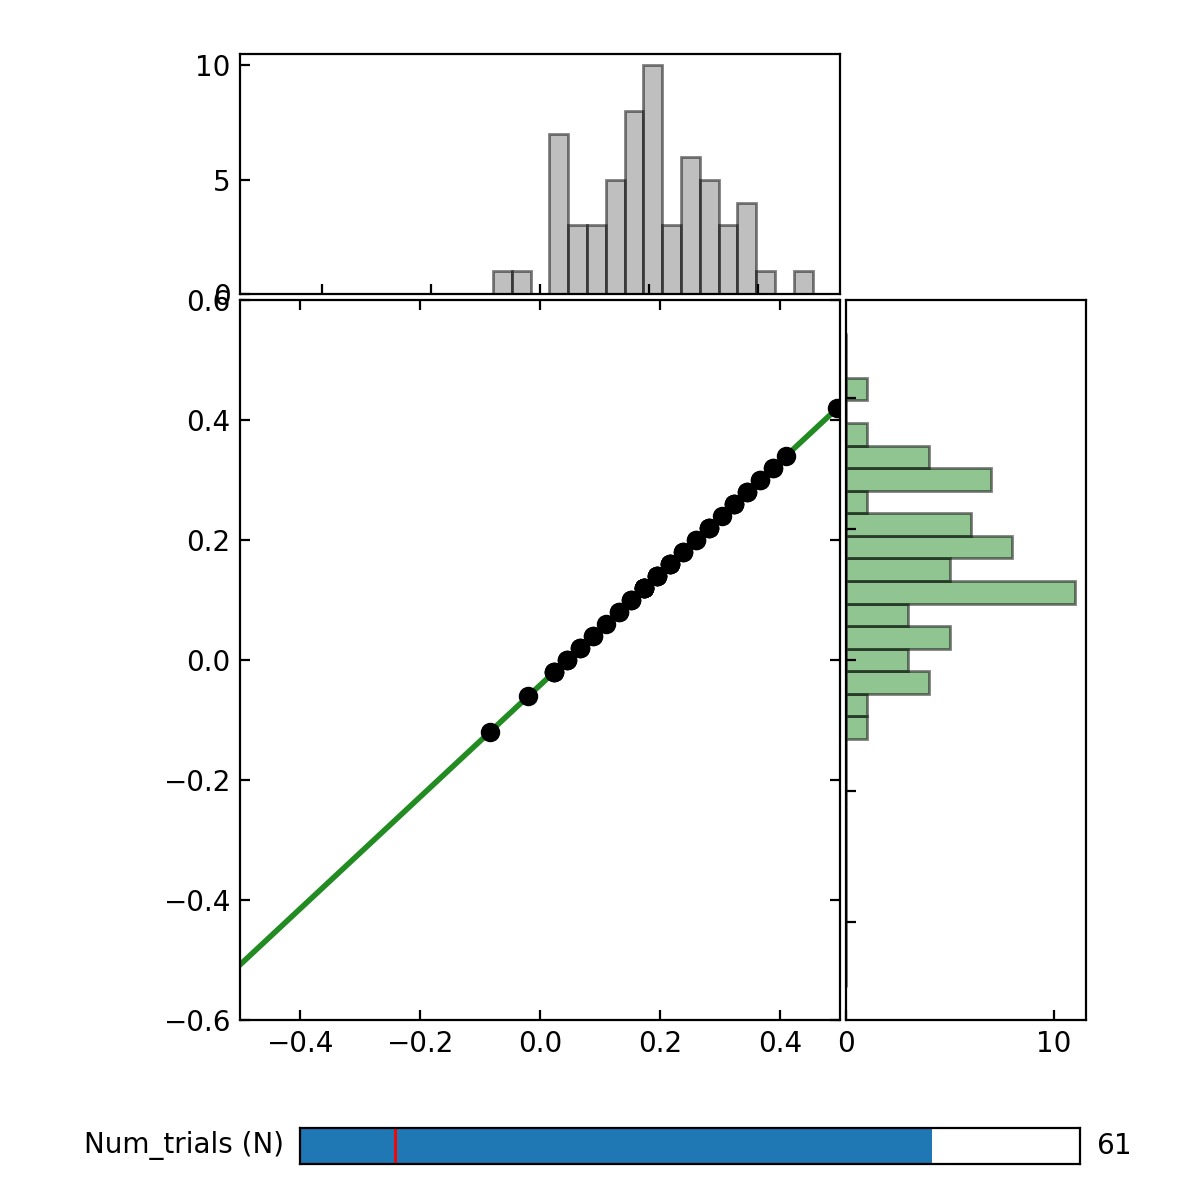

In [24]:
%matplotlib notebook
from matplotlib.widgets import Slider, Button

P = (num1 - num0) / 100 # polarization
phi_guess = calc_phi_fit_linear(P, A, C) # inverse the function to compute phi

# Add a straight line to plot
# definitions for the axes
left, width = 0.2, 0.5
bottom, height = 0.15, 0.6
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
fig = plt.figure(figsize=(6,6))
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.5)

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
# ax_scatter.plot(dphi, -np.cos(dphi + np.pi/2), color="forestgreen", lw=2)
ax_scatter.plot(dphi, A*dphi + C, color="forestgreen", lw=2)

ax_scatter.set_ylim([-0.6, 0.6])
ax_scatter.set_xlim([-0.5, 0.5])
ax_scatter.set_xlabel(r"$\delta\phi = \phi-\pi/2$", fontsize=20)
ax_scatter.set_ylabel(r"$P$", fontsize=20)

ax_scatter.axvline(x=0, color="k", ls=":", label="$\phi = \pi/2$")
ax_scatter.axhline(y=0, color="k", ls=":")

# Histogram (phi)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# plot angle histogram (along x)
bins_angle = np.linspace(-0.5, 0.5, 30)
ax_histx.axvline(x=0, color="k", ls=':')

# plot p_1 histogram (along y)
bins_p1 = np.linspace(-0.5, 0.5, 30)
ax_histy.axhline(y=0, color="k", ls=':')
ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

N_init = 10 
y_2p = P[:N_init]
x_2p = phi_guess[:N_init]
ax_scatter.plot(x_2p, y_2p, "ko")
ax_histy.hist(y_2p, bins=bins_p1, orientation='horizontal', alpha=0.5, \
              lw=1, ec='k', fc='forestgreen')
ax_histx.hist(x_2p, bins=bins_angle, alpha=0.5, \
              lw=1, ec='k', fc='grey')

# Make a horizontal slider to control N
ax_slider = fig.add_axes([0.25, 0.03, 0.65, 0.03])
Nslider = Slider(
    ax=ax_slider,
    label='Num_trials (N)',
    valmin=1,
    valmax=75,
    valinit=N_init,
    valstep=1,
)
    
def update(val):
    N = Nslider.val
    y_2p = P[:N]
    x_2p = phi_guess[:N]
    
    ax_scatter.clear()
    ax_scatter.set_ylim([-0.6, 0.6])
    ax_scatter.set_xlim([-0.5, 0.5])
    ax_scatter.plot(dphi, A*dphi + C, color="forestgreen", lw=2)
    ax_scatter.plot(x_2p, y_2p, "ko")
    
    ax_histy.clear()
    ax_histy.hist(y_2p, bins=bins_p1, orientation='horizontal', alpha=0.5, \
              lw=1, ec='k', fc='forestgreen')
    
    ax_histx.clear()
    ax_histx.hist(x_2p, bins=bins_angle, alpha=0.5, \
              lw=1, ec='k', fc='grey')
    fig.canvas.draw_idle()

# register the update function with each slider
Nslider.on_changed(update)

plt.show()